# What Sells a Videogame ?

We work for the online store Ice that sells video games all over the world. Users and experts reviews, genres, platforms, and historical data on game sales are available from open sources. We have to identify patterns that determine whether a game is successful or not

# Contents 

* [Intro](#intro)
* [Stage 1. Data loading](#data_loading)
    * [1.1 Exploring initial data](#initial_data)
* [Stage 2. Data preparation](#data_preparation)
    * [2.1 Columns renaming](#columns_renaming)
    * [2.2 Column 'name'](#name)
    * [2.3 Column 'year_of_release'](#year_of_release)
    * [2.4 Column 'critic_score'](#critic_score)
    * [2.5 Column 'user_score'](#user_score)
    * [2.5 Column 'rating'](#rating)
    * [2.6 Column 'tot_sales'](#tot_sales)
* [Stage 3. Data analysis](#data_analysis)
    * [3.1 Released videogames per year](#release)
    * [3.2 How sales vary from one platform to another](#sales_by_platform)
    * [3.3 Which period is more profitable for videogames](#best_period)
    * [3.4 What are the potentially profitable platforms](#best_platform)
    * [3.5 Studying and working the outliers](#outliers)
    * [3.6 How reviews affect sales of console](#reviews)
    * [3.7 Comparing sales of the same games on different platforms](#comparing)
    * [3.8 Most profitable genres](#genres)
* [Stage 4. Create a user profile for each region](#user_region)
    * [4.1 North America](#na)
        * [4.1.1 NA videogames consoles](#na_platform)
        * [4.1.2 NA videogames genre](#na_genre)
        * [4.1.3 NA videogame rating](#na_rating)
        * [4.1.4 Conclusion NA market](#na_conclusion)
    * [4.2 European Union](#eu)
        * [4.2.1 EU videogames consoles](#eu_platform)
        * [4.2.2 EU videogames genre](#eu_genre)
        * [4.2.3 EU videogame rating](#eu_rating)
        * [4.2.4 Conclusion EU market](#eu_conclusion)
    * [4.3 Japan](#jp)
        * [4.3.1 JP videogames consoles](#jp_platform)
        * [4.3.2 JP videogames genre](#jp_genre)
        * [4.3.3 JP videogame rating](#jp_rating)
        * [4.3.4 Conclusion JP market](#jp_conclusion)
    * [4.4 Markets comparison](#markets)
* [Stage 5. Hypotesis testing](#hypotesis_testing)
    * [5.1 Test: equality of the averages user_score for Xbox One and PC](#first_test)
    * [5.2 Test: inequality of the averages user_score for the Action and Sport games](#second_test)
* [General conclusion](#conclusion)

## Introduction <a id='intro'></a>

As stated before, we have to identify the elements that determine if a game is successful or not. This will allow us to spot promising projects and plan advertising campaigns.

## Stage 1. Data loading<a id='data_loading'></a>

In [88]:
# Loading all libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import norm
import seaborn as sns

In [2]:
# Load the data files into DataFrame
try:
    df = pd.read_csv('/Users/vidam/Desktop/PRACTICUM/Proyecto_5/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

### 1.1 Exploring initial data <a id='initial_data'></a>

In [3]:
# printing the general/summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


The dataset contains the following fields:
- `name` — name of the videogame
- `platform` — name of the platform
- `year_of_release`
- `genre` — duration of the call (in minutes)
- `na_sales` — sales in North America in millions of US dollars
- `eu_sales` — sales in Europe in millions of US dollars
- `jp_sales` —  sales in Japan in millions of US dollars
- `other_sales` — sales in other countries in millions of US dollars
- `critic_score` — 100 maximum
- `user_score` — 10 maximum
- `rating` — rating according to Entertainment Software Rating Board (ESRB)

In [4]:
# printing a data sample
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


So, we have a 16715 x 11 dataframe with 6 columns that have null values. At this stage the only null-values that we see are in the last three columns. Let's go deeper.

In [5]:
# printing the descriptive statistics about df
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Ok, mean, min, median and max values seem reasonable. Now we find the number of obvious duplicates in df:

In [6]:
# counting the obvious duplicate 
df.duplicated().sum()

0

Cool, there are no duplicates

## Stage 2. Data preparation<a id='data_preparation'></a>

### 2.1 Columns renaming <a id='columns_renaming'></a>

First important thing to highlight is the name of the columns. There is need to correct them with lowercase. Here we go then!

In [7]:
# renaming the columns
df.columns = df.columns.str.lower()

Now we focus on the columns, one by one. First one is "name" and it has 2 null values. Let's see them

### 2.2 Column 'name' <a id='name'></a>

In [8]:
# displaying the rows with null values in "name"
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Since these rows are really poor of info we can easily discard them

In [9]:
# dropping the rows null values in "name"
df.dropna(subset=['name'], inplace=True)

### 2.3 Column 'year_of_release' <a id='year_of_release'></a>

Ok, we skip now to the column 'year_of_release'. Let's see what the column contains.

In [10]:
# printing the general/summary information about 'year_of_release'
df.year_of_release.sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

The only awkward value is nan (the null values). We have to replace them in a smart way. This means that we will replace the null values with the mean value of the corresponding videogame (column 'name')

In [11]:
def my_lambda(x):
    return x.fillna(x.mean())

df['year_of_release'] = df.groupby(['name'])['year_of_release'].transform(lambda x: my_lambda(x))

In [12]:
# printing the general/summary information about 'year_of_release'
df.year_of_release.info()

<class 'pandas.core.series.Series'>
Int64Index: 16713 entries, 0 to 16714
Series name: year_of_release
Non-Null Count  Dtype  
--------------  -----  
16567 non-null  float64
dtypes: float64(1)
memory usage: 261.1 KB


We still have 150 null values (16567 non-null out of 16713). Since this is less than 1% of our dataframe, we can delete them without distorting our result.

In [13]:
# dropping the rows null values in "year_of_release"
df.dropna(subset=['year_of_release'], inplace=True)

In [14]:
# checking total missing values in 'year_of_release'
df.year_of_release.isna().sum()

0

Cool, we have now zero missing values in 'year_of_release'. We can convert the column to int.

In [15]:
# changing the column type
df['year_of_release'] = df['year_of_release'].astype('int64')

To be sure of what we have, we check again the general info of our dataframe

In [16]:
# printing the general/summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


The last three columns have null values. Let's see what we can do

### 2.4 Column 'critic_score' <a id='critic_score'></a>

Let's first see how many missing values are in 'critic score'

In [17]:
# checking total missing values in 'critic_score'
df.critic_score.isna().sum()

8492

The 'critic_score' column is almost half empty. Since we don't have enough info to perform a proper imputation of the 'critic_score' and 'user_score' null values, it is best to leave it as it is, without changing the nan values.

### 2.5 Column 'user_score' <a id='user_score'></a>

Now, we have to do the same with the 'user_score' column. Let's dive into it

In [18]:
# inspecting what values there are in the column
df.user_score.sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

There are null values but also some 'tbd' values (meaning "to be disclosed"). Let's count them:

In [19]:
# counting 'tbd' values in the 'user_score' column
len(df.loc[df['user_score'] == 'tbd'])

2394

In our case 'tbd' can be replaced with a null value, since it does not provide concrete information

In [20]:
# replacing 'tbd' with a null value
df.loc[df['user_score'] == 'tbd', ['user_score']] = np.nan

Let's check again our column

In [21]:
# inspecting what values there are in the column
print(df.user_score.sort_values().unique())
print()

# printing the general/summary information about 'user_score'
df.user_score.info()

['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' nan]

<class 'pandas.core.series.Series'>
Int64Index: 16567 entries, 0 to 16714
Series name: user_score
Non-Null Count  Dtype 
--------------  ----- 
7540 non-null   object
dtypes: object(1)
memory usage: 258.9+ KB


Ok, we got rid of 'tbd' and we are left with 7590 values out of 16713. Other thing that draws our attention is the type of 'user_score' column. We have to convert the type of the column from object to float

In [22]:
# changing the column type
df['user_score'] = df['user_score'].astype(float)

As already stated with 'critic_score', the column here is more than half empty and since we don't have enough info to perform an replace of the null values, it is best to leave it as it is.

### 2.5 Column 'rating' <a id='rating'></a>

In [23]:
# printing the general/summary information about 'rating'
df.rating.info()

<class 'pandas.core.series.Series'>
Int64Index: 16567 entries, 0 to 16714
Series name: rating
Non-Null Count  Dtype 
--------------  ----- 
9868 non-null   object
dtypes: object(1)
memory usage: 258.9+ KB


We have 9949 (out of 16713) non-null values, so 40% missing values. Let's see deeper in detail what this column contains:

In [24]:
# inspecting what values there are in the 'rating' column
df.rating.sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

This kind of scoring is pretty weird, so after a quick analysis on the web we realized the meaning of the abbreviations according to the Entertainment Software Rating Board (ESRB):
- `AO` — Adults Only (18+)
- `E` — Everyone 
- `E10+` — Everyone 10+
- `EC` — Early Childhood
- `K-A` — equal to `E` (used for games between 1994-98)
- `M` — Mature 17+
- `RP` — Rating Pending – Likely Mature
- `T` — Teen

This rating provides information about what's in a game or app so parents and consumers can make informed choices about which games are right for them.

Since we have 40% of missing values, the problem here is similar to 'user_score' and 'critic_score' columns. Best thing we can do in this case is replacing null values with the word 'unknown'.

In [25]:
# replacing 'tbd' with a null value
df.loc[df['rating'].isna(), ['rating']] = 'unknown'

### 2.6 Column 'tot_sales' <a id='tot_sales'></a>

Now we are going to calculate the total sales (the sum of sales across all regions) for each game and put these values in a separate column

In [26]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [27]:
# adding a column with the total sales for every single game
df['tot_sales']= df.iloc[:, 4:8].sum(axis=1)

Let's verify it:

In [28]:
# printing the general/summary information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           16567 non-null  object 
 11  tot_sales        16567 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


## Stage 3. Data analysis <a id='data_analysis'></a>

### 3.1 Released videogames per year <a id='release'></a>

First aim we have is finding how many games were released in different years. 

Let's use a groupby to get a new dataframe 'game_release' in which we get the year of release of each game (11559 in total). With the groupby we will use .mean() because many games are sold for different platforms and not always the year of release is the same for every platform

In [29]:
game_release = df.groupby(['name'])[['year_of_release']].mean()
game_release

,year_of_release
name,
Beyblade Burst,2016.0
Fire Emblem Fates,2015.0
Frozen: Olaf's Quest,2013.0
Haikyu!! Cross Team Match!,2016.0
Tales of Xillia 2,2012.0
...,...
thinkSMART FAMILY!,2010.0
thinkSMART: Chess for Kids,2011.0
uDraw Studio,2010.0


As done before, we need to reset the index of the new dataframe "game_release" to make our calculations

In [30]:
# resetting the index
game_release.reset_index(inplace=True)
game_release

,name,year_of_release
0,Beyblade Burst,2016.0
1,Fire Emblem Fates,2015.0
2,Frozen: Olaf's Quest,2013.0
3,Haikyu!! Cross Team Match!,2016.0
4,Tales of Xillia 2,2012.0
...,...,...
11421,thinkSMART FAMILY!,2010.0
11422,thinkSMART: Chess for Kids,2011.0
11423,uDraw Studio,2010.0
11424,uDraw Studio: Instant Artist,2011.0


Since we have some value in 'year_of_release' that are not int, we have to fix them rounding to the lowest nearest integer value

In [31]:
game_release['year_of_release'] = game_release['year_of_release'].apply(np.floor).astype(int)

And now we find how many games were released for each year

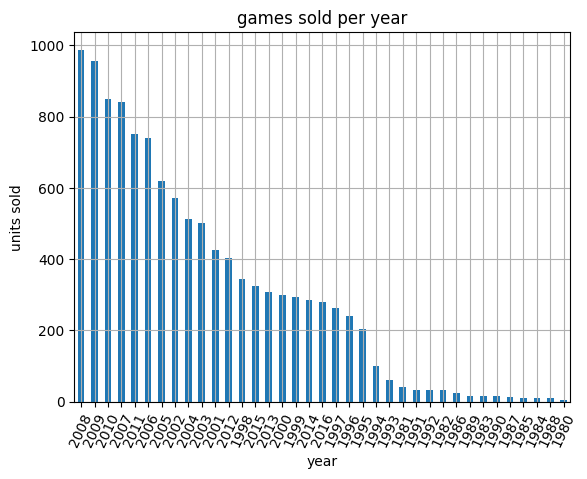

In [32]:
game_release['year_of_release'].value_counts().plot(kind='bar', grid=True)
plt.title("games sold per year")
plt.xticks(rotation=65)
plt.xlabel('year')
plt.ylabel('units sold')
plt.show()

Ok, we got a first view on what are the sell per year but let's try to get a better view in with increasing years on the x-axis

In [33]:
game_year_count = game_release.groupby(['year_of_release'])[['name']].count()
game_year_count.reset_index(inplace=True)

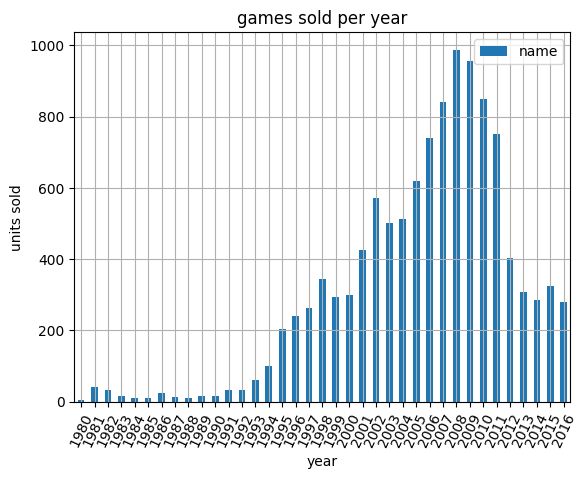

In [34]:
game_year_count.plot.bar(x='year_of_release', y='name', grid=True)
plt.title("games sold per year")
plt.xticks(rotation=65)
plt.xlabel('year')
plt.ylabel('units sold')
plt.show()

So, generally speaking we can affirm there was an increase of sales year after year from 1990 until 2008. After that a huge drop of new released videogames happened

### 3.2 How sales vary from one platform to another <a id='sales_by_platform'></a>

Let's get the first 10 consoles by sales:

In [35]:
# getting the top 10 consoles by sales
platform_sales = df.groupby(['platform'])[['tot_sales']].sum()
top_ten_platform = platform_sales.sort_values('tot_sales', ascending=False).head(10)
top_ten_platform.reset_index(inplace=True)
top_ten_platform

,platform,tot_sales
0,PS2,1247.16
1,X360,966.61
2,PS3,935.19
3,Wii,903.31
4,DS,804.28
5,PS,727.58
6,PS4,314.14
7,GBA,313.73
8,PSP,293.57
9,PC,258.86


Cool, what we need now is the initial dataframe filtered in order to get only the rows that concern the top 10 consoles

In [36]:
# filtered df with the top 10 platforms
data_best_platform = df.query('platform in @top_ten_platform.platform')

Let's now create a pivot table that reports the revenue for each year of every platform

In [37]:
# sales by year of the 10 best platforms
sales_year_platform = data_best_platform.pivot_table(index='year_of_release', 
                                                     columns='platform',
                                                     values='tot_sales',
                                                     aggfunc='sum')
sales_year_platform

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985,0.02,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,12.87,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,4.22,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,10.58,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,11.27,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,3.26,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,4.74,144.53,NaN,NaN,NaN,NaN,NaN,NaN


And now, let's represent this pivot table in a more intuitive manner:

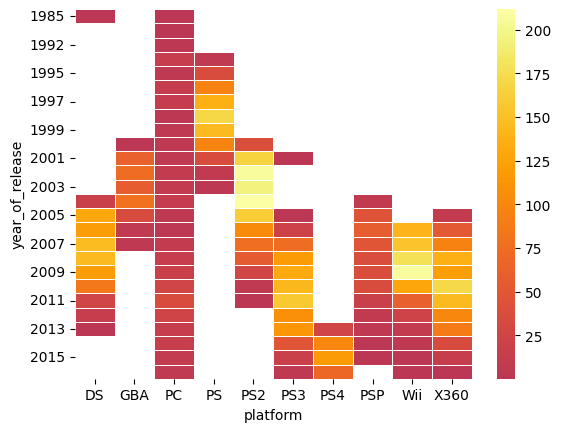

In [38]:
sns.heatmap(sales_year_platform, center=0, linecolor='white', linewidths=0.5, cmap='inferno')
plt.show()

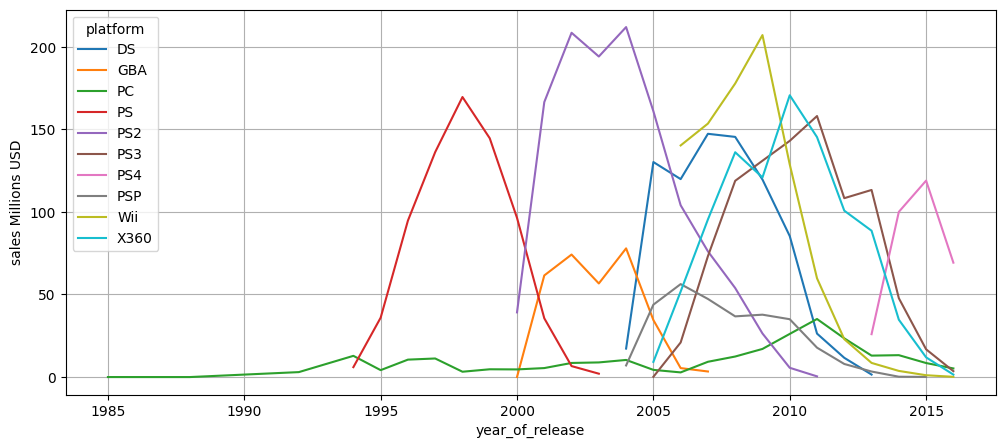

In [39]:
sales_year_platform.plot(figsize=(12, 5), grid=True, ylabel='sales Millions USD')
plt.show()

Now we have to answer the question: How long does it usually take for new platforms to appear and old ones to disappear?

Well, to answer this question we have to define what 'appear' means. Let's say that a platform appears when the its sales overcome 50M $. So, the time between the first sell and the moment reaching 50M is on average +/- 2 years. 

To answer how long do they take to disappear, we have to consider the time between the console fisrt touch 50M and the moment when the sales go south of 50 million dollars. This period last +/- 5 years

Generally they reach their peak after +/- 3 year from their first sell.

### 3.3 Which period is more profitable for videogames <a id='best_period'></a>

The idea is to find the years in which sales were higher independently of the console

In [40]:
# finding the general sales per year
top_year_sales = data_best_platform.pivot_table(index=['year_of_release'], values='tot_sales', aggfunc='sum'
                                     ).sort_values(by='tot_sales', ascending=False).reset_index().head(10)

top_year_sales

,year_of_release,tot_sales
0,2008,681.02
1,2009,659.51
2,2007,605.32
3,2010,594.36
4,2006,501.33
5,2011,442.76
6,2005,383.21
7,2004,324.44
8,2002,297.76
9,2012,275.01


Videogames were significantly more popular between the year 2006-2010. On the other side, almost all the consoles available in 2006-10 don't exist anymore for the year of our analysis (2017) so it would not make sense to include them in our analysis. So, from now on we work only with data from year 2012. So, let's generate our new updated dataframe:

In [41]:
df_2012 = data_best_platform.query('year_of_release >= 2012')

### 3.4 What are the potentially profitable platforms <a id='best_platform'></a>

Weird to say, but after 2008 there was a consistent drop of popularity for videogames. The only survivors were X360 and PS3 but eventually discontinued in 2016. After 2013, only PS4 had a rapid increase in sales but also a decrease after 2015. Anyway, PS4 is the only console with more than 50M$ sales in 2016.

### 3.5 Studying and working the outliers <a id='outliers'></a>

What we look for now is a boxplot for global sales of all games, broken down by platform.

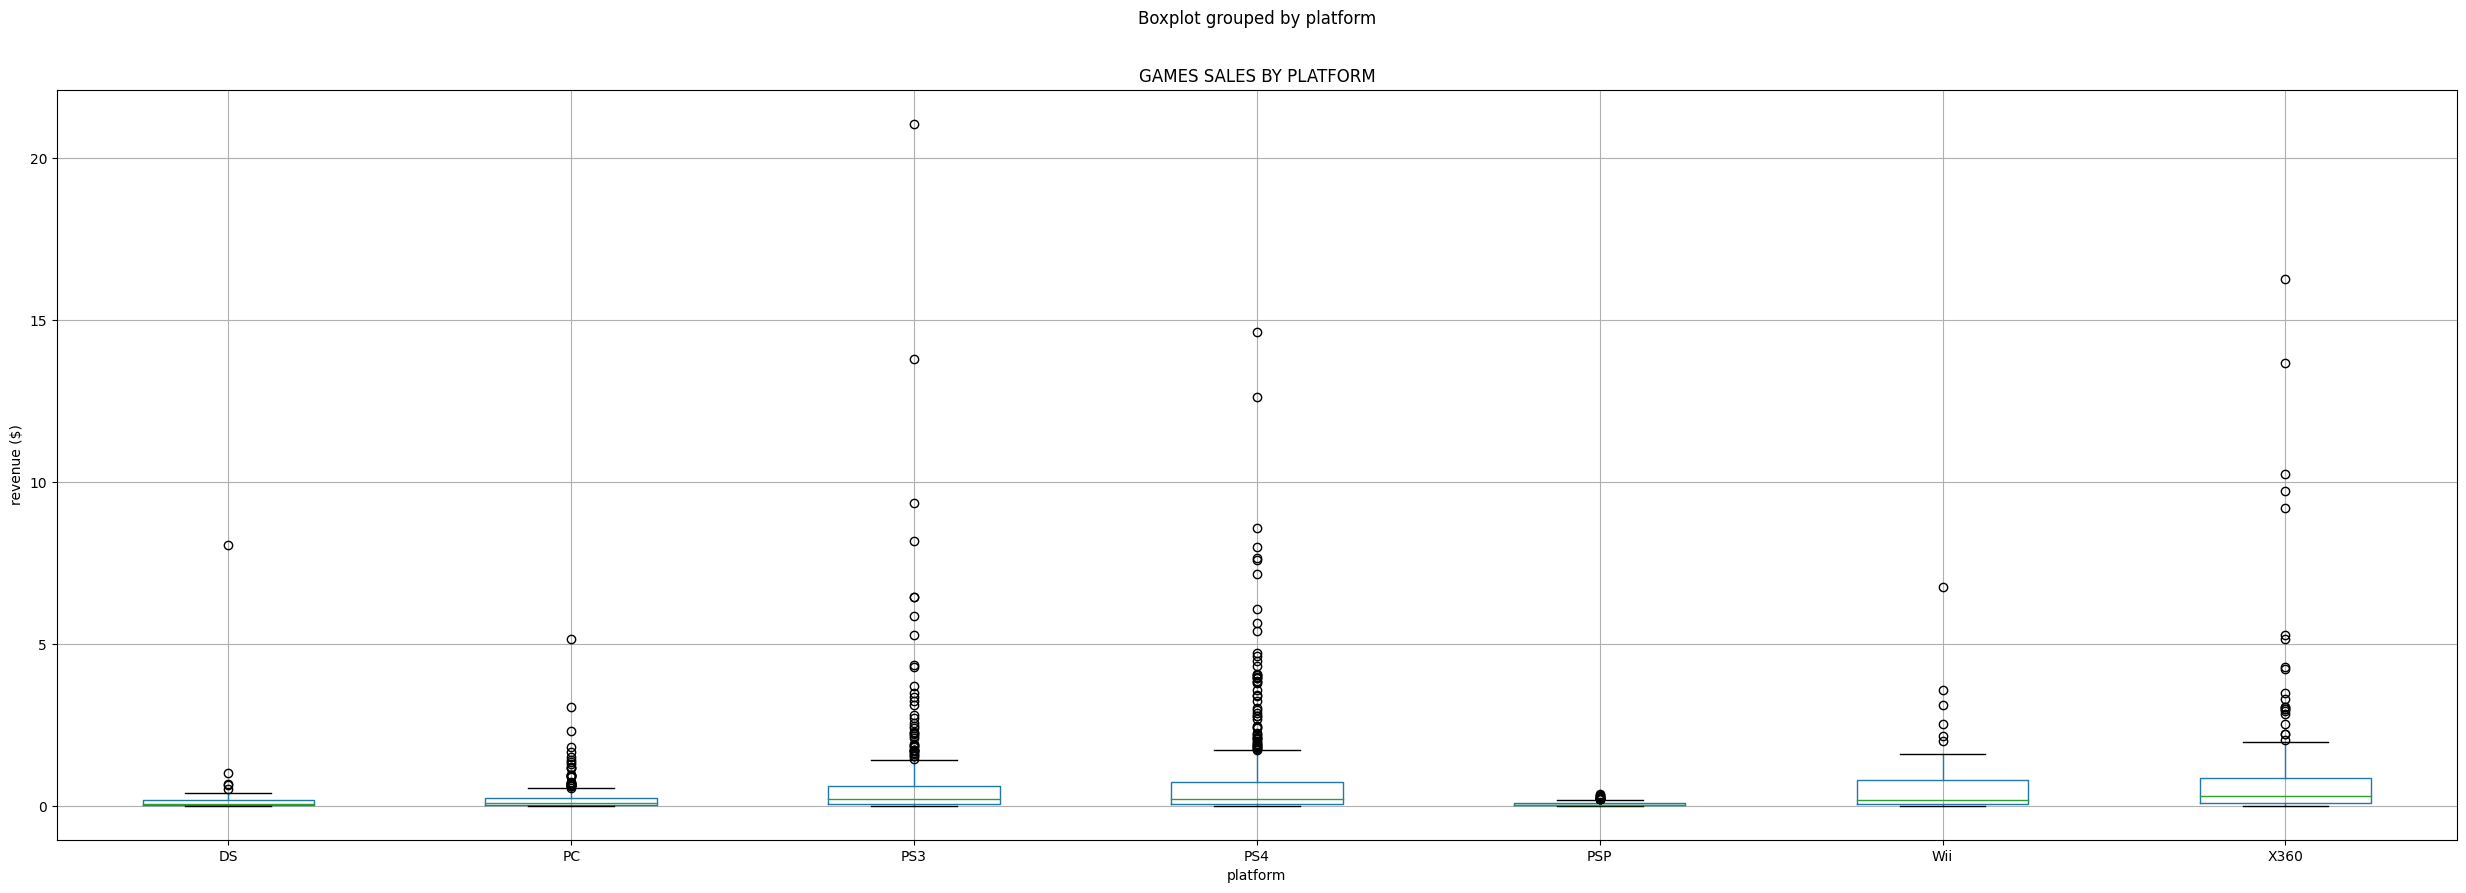

In [42]:
df_2012.boxplot(column='tot_sales', by='platform', figsize=(30, 10))
plt.title('GAMES SALES BY PLATFORM')
plt.xlabel('platform')
plt.ylabel('revenue ($)')
plt.show()

This last plot does not help a lot. So, we need to filter the outliers in order to have a more appreciable view

Let's create a table with all data related to boxplot:

In [43]:
table_price = df_2012.groupby("platform")["tot_sales"].describe()
table_price["upper_bound"] = table_price["75%"] + 1.5*(table_price["75%"] - table_price["25%"])
table_price["lower_bound"] = table_price["25%"] - 1.5*(table_price["75%"] - table_price["25%"])
table_price

,count,mean,std,min,25%,50%,75%,max,upper_bound,lower_bound
platform,,,,,,,,,,
DS,32.0,0.412812,1.416559,0.01,0.020,0.05,0.195,8.06,0.4575,-0.2425
PC,255.0,0.249059,0.490149,0.01,0.030,0.08,0.240,5.14,0.5550,-0.2850
PS3,494.0,0.586457,1.461448,0.01,0.050,0.20,0.610,21.05,1.4500,-0.7900
PS4,392.0,0.801378,1.609456,0.01,0.060,0.20,0.730,14.63,1.7350,-0.9450
PSP,175.0,0.066800,0.073594,0.01,0.020,0.04,0.090,0.36,0.1950,-0.0850
Wii,55.0,0.665455,1.157206,0.01,0.065,0.18,0.790,6.76,1.8775,-1.0225
X360,294.0,0.807891,1.706880,0.01,0.100,0.31,0.870,16.27,2.0250,-1.0550


And now that we have the table, let's create a new dataframe 'df_2012_filtered' skimmed of outliers

In [44]:
df_2012_filtered = pd.DataFrame()

for platform in df_2012['platform'].unique():
    new_df_2012 =df_2012.loc[ (df_2012['platform'] == platform) & (df_2012['tot_sales'] < table_price.loc[platform, "upper_bound"]) & (df_2012['tot_sales'] > table_price.loc[platform, "lower_bound"])]
    df_2012_filtered = pd.concat([df_2012_filtered, new_df_2012])

In [45]:
table_price_filtered = df_2012_filtered.groupby("platform")["tot_sales"].describe()
table_price_filtered["upper_bound"] = table_price_filtered["75%"] + 1.5*(table_price_filtered["75%"] - table_price_filtered["25%"])
table_price_filtered["lower_bound"] = table_price_filtered["25%"] - 1.5*(table_price_filtered["75%"] - table_price_filtered["25%"])
table_price_filtered

,count,mean,std,min,25%,50%,75%,max,upper_bound,lower_bound
platform,,,,,,,,,,
DS,27.0,0.084074,0.106057,0.01,0.02,0.03,0.110,0.40,0.2450,-0.1150
PC,224.0,0.116741,0.127998,0.01,0.02,0.06,0.170,0.55,0.3950,-0.2050
PS3,455.0,0.307626,0.343191,0.01,0.04,0.16,0.455,1.42,1.0775,-0.5825
PS4,338.0,0.306213,0.384944,0.01,0.05,0.14,0.390,1.73,0.9000,-0.4600
PSP,160.0,0.049188,0.044973,0.01,0.02,0.03,0.070,0.19,0.1450,-0.0550
Wii,49.0,0.335714,0.403681,0.01,0.05,0.15,0.500,1.60,1.1750,-0.6250
X360,273.0,0.460769,0.487554,0.01,0.09,0.26,0.730,1.97,1.6900,-0.8700


And finally with 'df_2012_filtered' we can boxplot our data:

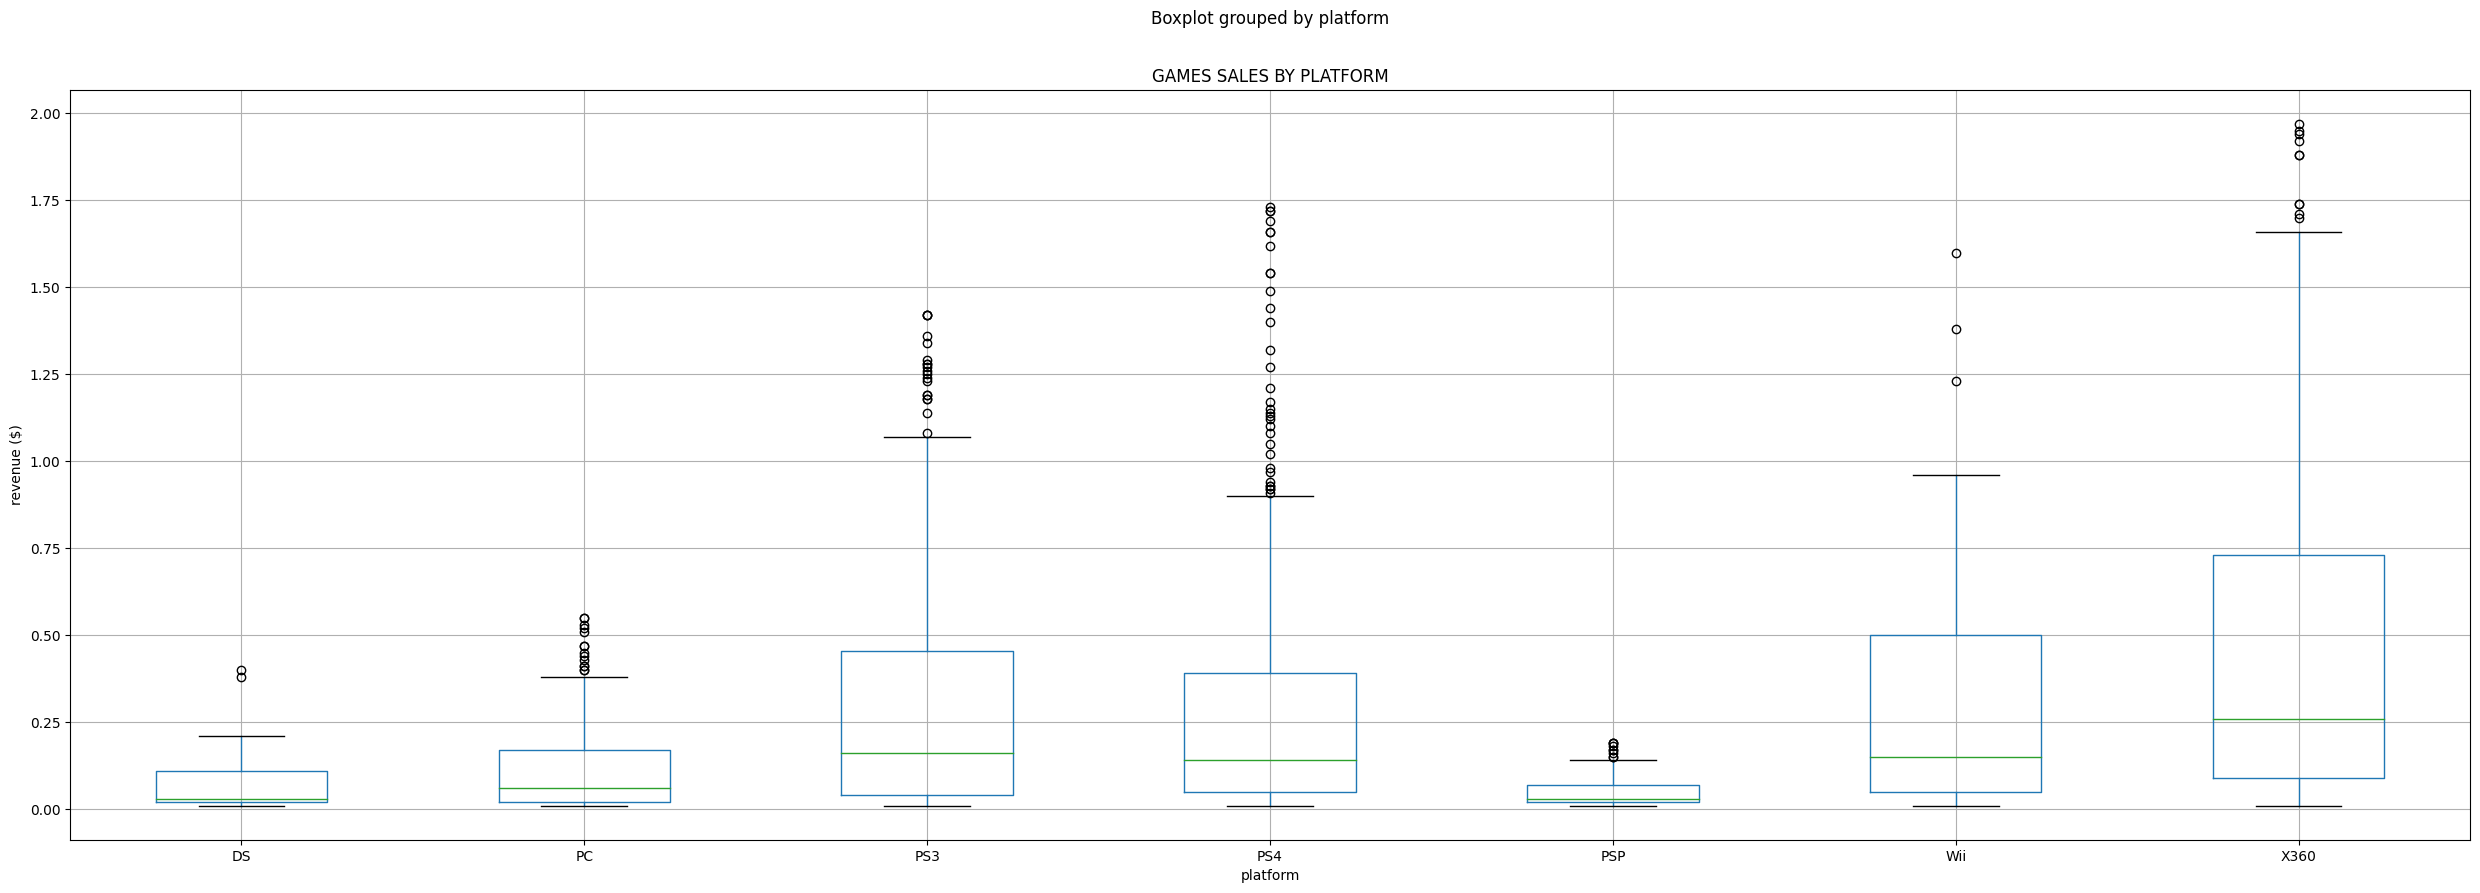

In [46]:
df_2012_filtered.boxplot(column='tot_sales', by='platform', figsize=(30, 10))
plt.title('GAMES SALES BY PLATFORM')
plt.xlabel('platform')
plt.ylabel('revenue ($)')
plt.show()

Ok, the view here is slightly better. So, the two consoles with the best-selling videogames are X360 and PS3. Wii is the third

### 3.6 How reviews affect sales of console <a id='reviews'></a>

In this chapter the goal is to see if there is any relation between users and professionals's reviews and the sales of a popular platform. We choose X360

In [47]:
df_x360_corr = df_2012.query('platform == "X360"')

We are going to create a dispersion graph and calculate the correlation between the reviews and the sales

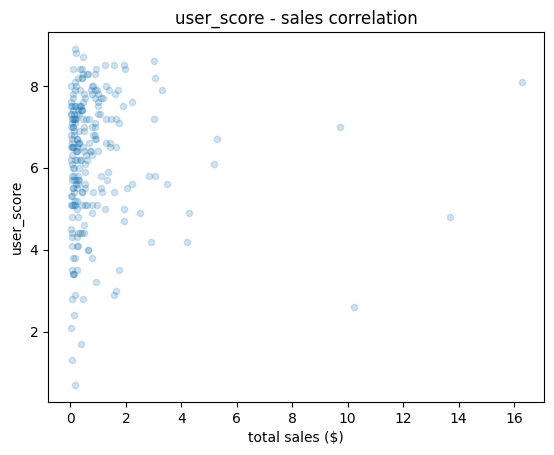

In [48]:
df_x360_corr.plot(x='tot_sales', y='user_score', kind='scatter', alpha=0.2)
plt.title('user_score - sales correlation')
plt.xlabel('total sales ($)')
plt.ylabel('user_score')
plt.show()

The trend here is not very explicit but to certain extent we can say that the higher user_score the videogame has the higher it will sell.

Let's do the same but this time with 'critic_score':

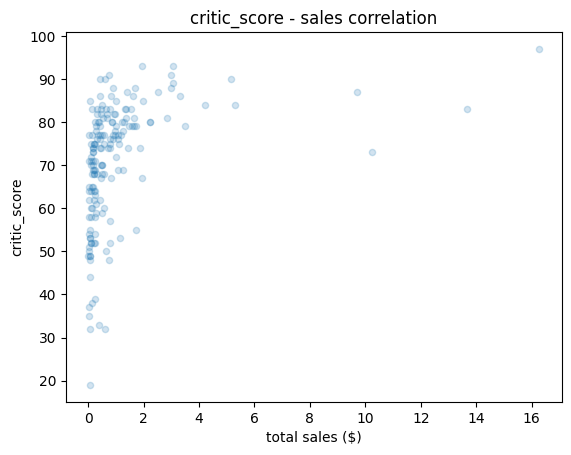

In [49]:
df_x360_corr.plot(x='tot_sales', y='critic_score', kind='scatter', alpha=0.2)
plt.title('critic_score - sales correlation')
plt.xlabel('total sales ($)')
plt.ylabel('critic_score')
plt.show()

The situation is clearer then the previous case. There is a quiai-linear correlation between critic_score and sales. If one grows the other will also grow.

Let's go deeper in detail, finding the related correlation matrix.

In [50]:
df_correlation = df_x360_corr.drop(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales','jp_sales', 'other_sales', 'rating'], axis='columns')
df_correlation.corr()

,critic_score,user_score,tot_sales
critic_score,1.000000,0.557952,0.360266
user_score,0.557952,1.000000,0.006315
tot_sales,0.360266,0.006315,1.000000


So, technically speaking, critic_score is way more reliable then user_score to predict the sale of a videogame. (0.36 > 0.006)

### 3.7 Comparing sales of the same games on different platforms <a id='comparing'></a>

As stated in the title, the aim now is to compare the revenue coming by same videogames but on different platforms.

So, we do our analysis with the dataframe that concerns only the data from the year 2012 on: 'df_2012'

In [51]:
game_group = df_2012.groupby(['name', 'platform'])[['tot_sales']].agg('sum')
game_group.reset_index(inplace=True)
game_group

,name,platform,tot_sales
0,Frozen: Olaf's Quest,DS,0.51
1,Tales of Xillia 2,PS3,0.84
2,.hack: Sekai no Mukou ni + Versus,PS3,0.03
3,1/2 Summer +,PSP,0.01
4,2 in 1 Combo Pack: Sonic Heroes / Super Monkey...,X360,0.11
...,...,...,...
1691,Zumba Fitness: World Party,Wii,0.23
1692,[Prototype 2],PC,0.11
1693,[Prototype 2],PS3,0.74
1694,[Prototype 2],X360,0.79


Now, in order to perform the comparison we need to find duplicates in the column 'name'

In [52]:
game_group_duplicates = game_group[game_group['name'].duplicated()]
game_group_duplicates = game_group_duplicates.sort_values(by='name')
game_group_duplicates

,name,platform,tot_sales
6,2014 FIFA World Cup Brazil,X360,0.43
14,AKB1/149: Love Election,PSP,0.23
17,Accel World: Ginyoku no Kakusei,PSP,0.03
19,Accel World: Kasoku no Chouten,PSP,0.01
22,Adventure Time: Explore the Dungeon Because I ...,X360,0.08
...,...,...,...
1681,Young Justice: Legacy,X360,0.01
1686,Zone of the Enders HD Collection,X360,0.20
1689,Zumba Fitness Core,X360,0.05
1693,[Prototype 2],PS3,0.74


Maybe it is better to consider only videogames with sales over 1M $

In [53]:
game_group_duplicates.query('tot_sales > 1', inplace=True)

And now we get the 15 most played videogames between different consoles

In [54]:
most_reproduced_games = game_group_duplicates['name'].value_counts().sort_values(ascending=False).head(10)

Since 'most_reproduced_games' is a type Series we have to convert it to dataframe

In [55]:
# converting to DataFrame type
most_reproduced_games = pd.DataFrame(most_reproduced_games)

In [56]:
# printing the general/summary information about 'most_reproduced_games'
most_reproduced_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, LEGO Marvel Super Heroes to FIFA 16
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   name    10 non-null     int64
dtypes: int64(1)
memory usage: 160.0+ bytes


Now we should reset the index and rename its columns properly

In [57]:
# resetting the index and renaming the columns
most_reproduced_games.reset_index(inplace=True)
most_reproduced_games.rename(columns = {'index':'videogame', 'name':'sum_tot_sales'}, inplace = True)

Now we need to streamline the 'game_group_duplicates' dataframe keeping only the 15 most played videogames between different consoles

In [58]:
game_group_duplicates_list = game_group_duplicates.loc[game_group_duplicates['name'].isin(most_reproduced_games.videogame)]

And finally we plot our side by side bar graph 

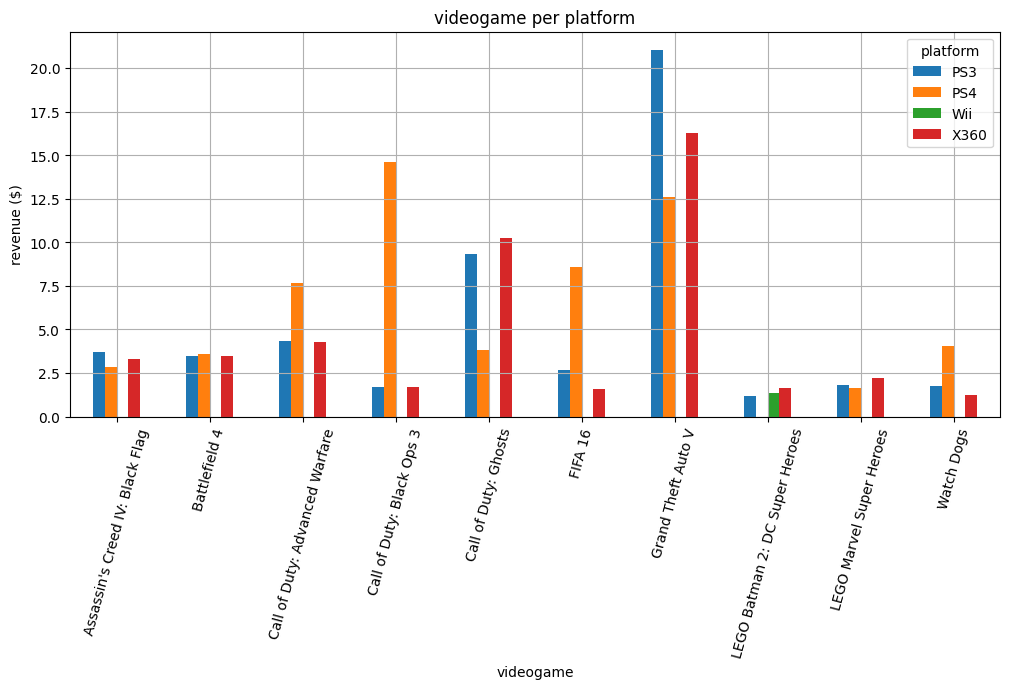

In [59]:
game_group_duplicates_list.pivot(index='name', columns='platform', values='tot_sales').plot(kind='bar', grid=True, figsize=(12,5))
plt.title("videogame per platform")
plt.xticks(rotation=75)
plt.xlabel('videogame')
plt.ylabel('revenue ($)')
plt.show()

PS4 and X360 are the most consistent consoles

### 3.8 Most profitable genres <a id='genres'></a>

We are going to analyze the general distribution of games by genre.

In [60]:
genre_count = df_2012.groupby(['genre'])[['name']].agg('count')
genre_count.sort_values(by='name', ascending=False, inplace=True)
genre_count

,name
genre,
Action,590
Sports,189
Role-Playing,186
Shooter,183
Adventure,160
Misc,89
Racing,82
Fighting,74
Simulation,52


'Action' and 'Sport' are the most sold

This last table reports the number of videogames sold per each genre. Let's now see instead the amount of money generated by each genre. 

In [61]:
genre_sales = df_2012.groupby(['genre'])[['tot_sales']].agg('sum')
genre_sales.sort_values(by='tot_sales', ascending=False, inplace=True)
genre_sales

,tot_sales
genre,
Action,327.81
Shooter,235.94
Sports,143.73
Role-Playing,88.01
Misc,51.62
Racing,33.35
Fighting,25.10
Adventure,18.49
Platform,17.17


Let's try to go deeper on our analysis finding the specific income for each genre. So, first we join the two previous tables, we add a third column 'specific_sale' dividing 'tot_sales' by 'name' and finally we arrange the table with the higher specific_sale on top

In [62]:
new_genre_sales = genre_sales.join(genre_count, on=['genre'])
new_genre_sales['specific_sale'] = new_genre_sales['tot_sales']/new_genre_sales['name']
new_genre_sales.sort_values(by='specific_sale', ascending=False, inplace=True)
new_genre_sales

,tot_sales,name,specific_sale
genre,,,
Shooter,235.94,183,1.289290
Sports,143.73,189,0.760476
Misc,51.62,89,0.580000
Action,327.81,590,0.555610
Platform,17.17,36,0.476944
Role-Playing,88.01,186,0.473172
Racing,33.35,82,0.406707
Fighting,25.10,74,0.339189
Simulation,14.25,52,0.274038


So, Action is the most sold and biggest revenue generator genre. 'Shooter' instead is the most expensive per unit genre while 'Puzzle' is the least.

## Stage 4. Create a user profile for each region <a id='user_region'></a>

Our goal in this stage is to determine for each region, North America (NA), European Union (EU) and Japan (JP), the following:
- the five most sold platform, describing the variations in their market shares from one region to another
- The five most sold genres. 
- Whether ESRB ratings affect sales or not 

### 4.1 North America <a id='NA'></a>

#### 4.1.1 NA videogames consoles <a id='na_platform'></a>

Let's begin then with the 5 most sold consoles

In [63]:
na_platform_sales = df_2012.groupby(['platform'])[['na_sales']].agg('sum')
na_platform_sales.sort_values(by='na_sales', ascending=False, inplace=True)
na_platform_sales.reset_index(inplace=True)
na_platform_sales = na_platform_sales.head()
na_platform_sales['percent'] = (na_platform_sales['na_sales'] / na_platform_sales['na_sales'].sum()) * 100
na_platform_sales

,platform,na_sales,percent
0,X360,140.57,36.002049
1,PS4,108.74,27.849917
2,PS3,103.74,26.569343
3,PC,19.26,4.932770
4,Wii,18.14,4.645921


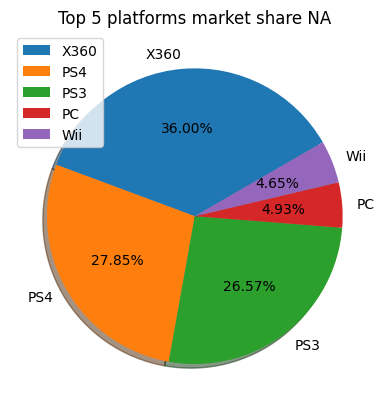

In [64]:
plt.pie(na_platform_sales.na_sales, labels = na_platform_sales['platform'], autopct='%1.2f%%', shadow=True, startangle=30)
plt.title("Top 5 platforms market share NA")
plt.legend()
plt.show()

X360 leads the chart above PS4 and PS3.

#### 4.1.2 NA videogames genre <a id='na_genre'></a>

Now we want the five most sold genres. The process is similar as it was for platform

In [65]:
na_genre_sales = df_2012.groupby(['genre'])[['na_sales']].agg('sum')
na_genre_sales.sort_values(by='na_sales', ascending=False, inplace=True)
na_genre_sales.reset_index(inplace=True)
na_genre_sales = na_genre_sales.head()
na_genre_sales['percent'] = (na_genre_sales['na_sales'] / na_genre_sales['na_sales'].sum()) * 100
na_genre_sales

,genre,na_sales,percent
0,Action,131.68,36.914106
1,Shooter,104.64,29.333931
2,Sports,62.75,17.590828
3,Role-Playing,32.07,8.990244
4,Misc,25.58,7.170890


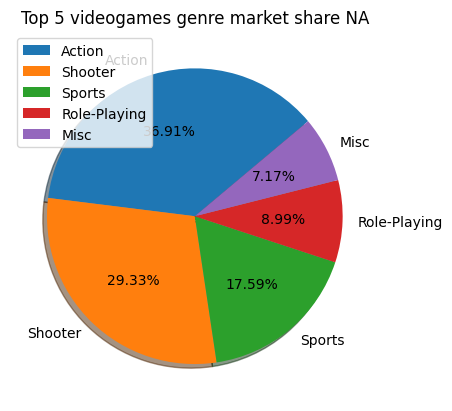

In [66]:
plt.pie(na_genre_sales.na_sales, labels = na_genre_sales['genre'], autopct='%1.2f%%', shadow=True, startangle=40)
plt.title("Top 5 videogames genre market share NA")
plt.legend()
plt.show() 

In this case, Action videogames lead the chart.

#### 4.1.3 NA videogame rating <a id='na_rating'></a>

In [67]:
na_rating_sales = df_2012.groupby(['rating'])[['na_sales']].agg('sum')
na_rating_sales.sort_values(by='na_sales', ascending=False, inplace=True)
na_rating_sales.reset_index(inplace=True)
na_rating_sales = na_rating_sales.head()
na_rating_sales['percent'] = (na_rating_sales['na_sales'] / na_rating_sales['na_sales'].sum()) * 100
na_rating_sales

,rating,na_sales,percent
0,M,179.69,45.420995
1,E,65.52,16.561765
2,unknown,55.28,13.973358
3,E10+,47.65,12.044690
4,T,47.47,11.999191


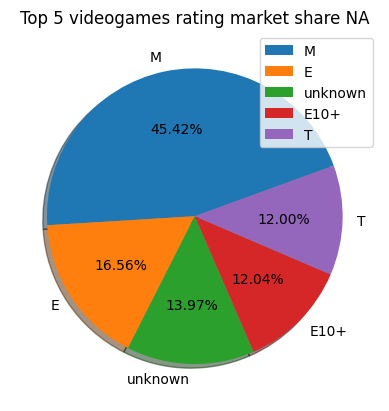

In [68]:
plt.pie(na_rating_sales.na_sales, labels = na_rating_sales['rating'], autopct='%1.2f%%', shadow=True, startangle=20)
plt.title("Top 5 videogames rating market share NA")
plt.legend()
plt.show()

Sales of 'M' (=Mature +17) games outperform the others.

#### 4.1.4 Conclusion NA market <a id='na_conclusion'></a>

So for the North American market the highest sales are best linked to X360 console, Action and M rated videogames 

### 4.2 European Union <a id='eu'></a>

#### 4.2.1 EU videogames consoles <a id='eu_platform'></a>

In [69]:
eu_platform_sales = df_2012.groupby(['platform'])[['eu_sales']].agg('sum')
eu_platform_sales.sort_values(by='eu_sales', ascending=False, inplace=True)
eu_platform_sales.reset_index(inplace=True)
eu_platform_sales = eu_platform_sales.head()
eu_platform_sales['percent'] = (eu_platform_sales['eu_sales'] / eu_platform_sales['eu_sales'].sum()) * 100
eu_platform_sales

,platform,eu_sales,percent
0,PS4,141.09,37.727625
1,PS3,107.27,28.684119
2,X360,74.89,20.025671
3,PC,38.38,10.262855
4,Wii,12.34,3.299730


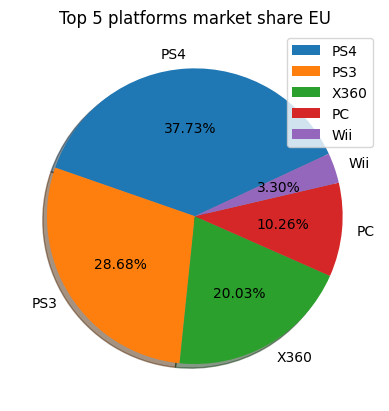

In [70]:
plt.pie(eu_platform_sales.eu_sales, labels = eu_platform_sales['platform'], autopct='%1.2f%%', shadow=True, startangle=25)
plt.title("Top 5 platforms market share EU")
plt.legend()
plt.show() 

#### 4.2.2 EU videogames genre <a id='eu_platform'></a>

In [71]:
eu_genre_sales = df_2012.groupby(['genre'])[['eu_sales']].agg('sum')
eu_genre_sales.sort_values(by='eu_sales', ascending=False, inplace=True)
eu_genre_sales.reset_index(inplace=True)
eu_genre_sales = eu_genre_sales.head()
eu_genre_sales['percent'] = (eu_genre_sales['eu_sales'] / eu_genre_sales['eu_sales'].sum()) * 100
eu_genre_sales

,genre,eu_sales,percent
0,Action,128.85,39.478522
1,Shooter,93.03,28.503585
2,Sports,56.75,17.387708
3,Role-Playing,28.68,8.787303
4,Racing,19.07,5.842883


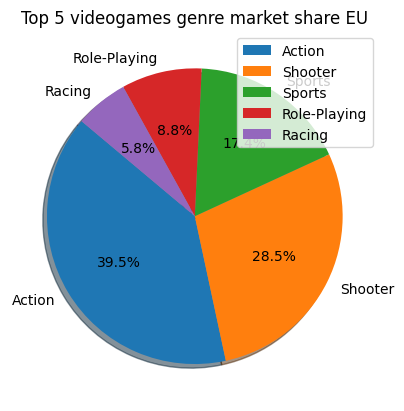

In [72]:
plt.pie(eu_genre_sales.eu_sales, labels = eu_genre_sales['genre'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Top 5 videogames genre market share EU")
plt.legend()
plt.show()

#### 4.2.3 EU videogame rating <a id='eu_rating'></a>

In [73]:
eu_rating_sales = df_2012.groupby(['rating'])[['eu_sales']].agg('sum')
eu_rating_sales.sort_values(by='eu_sales', ascending=False, inplace=True)
eu_rating_sales.reset_index(inplace=True)
eu_rating_sales = eu_rating_sales.head()
eu_rating_sales['percent'] = (eu_rating_sales['eu_sales'] / eu_rating_sales['eu_sales'].sum()) * 100
eu_rating_sales

,rating,eu_sales,percent
0,M,166.18,43.931583
1,E,75.33,19.914347
2,unknown,56.59,14.960214
3,T,42.73,11.296164
4,E10+,37.44,9.897692


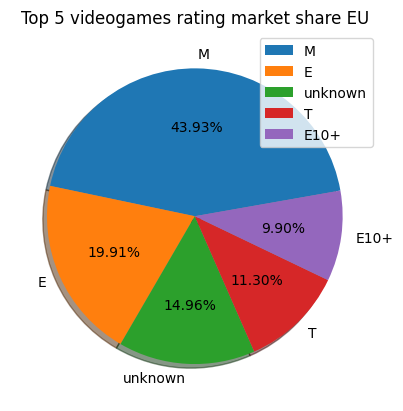

In [74]:
plt.pie(eu_rating_sales.eu_sales, labels = eu_rating_sales['rating'], autopct='%1.2f%%', shadow=True, startangle=10)
plt.title("Top 5 videogames rating market share EU")
plt.legend()
plt.show() 

#### 4.2.4 Conclusion EU market <a id='eu_conclusion'></a>

So for the European market the highest sales are best linked to PS4 console, Action and M-rated videogames 

### 4.3 Japan <a id='jp'></a>

#### 4.3.1 JP videogames consoles <a id='jp_platform'></a>

In [75]:
jp_platform_sales = df_2012.groupby(['platform'])[['jp_sales']].agg('sum')
jp_platform_sales.sort_values(by='jp_sales', ascending=False, inplace=True)
jp_platform_sales.reset_index(inplace=True)
jp_platform_sales = jp_platform_sales.head()
jp_platform_sales['percent'] = (jp_platform_sales['jp_sales'] / jp_platform_sales['jp_sales'].sum()) * 100
jp_platform_sales

,platform,jp_sales,percent
0,PS3,35.29,51.093094
1,PS4,15.96,23.106993
2,PSP,10.71,15.506008
3,DS,3.72,5.385840
4,Wii,3.39,4.908064


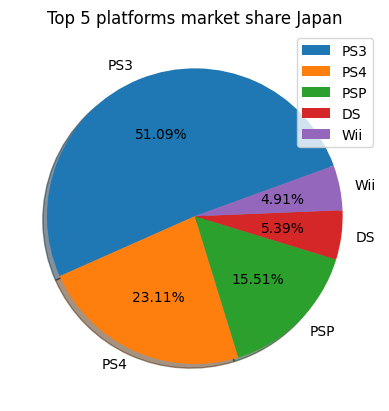

In [76]:
plt.pie(jp_platform_sales.jp_sales, labels = jp_platform_sales['platform'], autopct='%1.2f%%', shadow=True, startangle=20)
plt.title("Top 5 platforms market share Japan")
plt.legend()
plt.show() 

#### 4.3.2 JP videogames genre <a id='jp_genre'></a>

In [77]:
jp_genre_sales = df_2012.groupby(['genre'])[['jp_sales']].agg('sum')
jp_genre_sales.sort_values(by='jp_sales', ascending=False, inplace=True)
jp_genre_sales.reset_index(inplace=True)
jp_genre_sales = jp_genre_sales.head()
jp_genre_sales['percent'] = (jp_genre_sales['jp_sales'] / jp_genre_sales['jp_sales'].sum()) * 100
jp_genre_sales

,genre,jp_sales,percent
0,Action,24.44,41.034251
1,Role-Playing,17.93,30.104097
2,Shooter,7.35,12.340497
3,Sports,5.05,8.478845
4,Fighting,4.79,8.042310


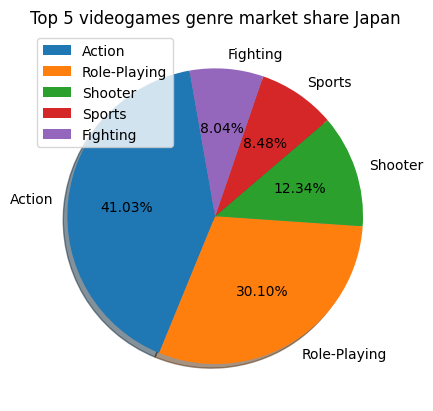

In [78]:
plt.pie(jp_genre_sales.jp_sales, labels = jp_genre_sales['genre'], autopct='%1.2f%%', shadow=True, startangle=100)
plt.title("Top 5 videogames genre market share Japan")
plt.legend()
plt.show() 

#### 4.3.3 JP videogame rating <a id='jp_rating'></a>

In [79]:
jp_rating_sales = df_2012.groupby(['rating'])[['jp_sales']].agg('sum')
jp_rating_sales.sort_values(by='jp_sales', ascending=False, inplace=True)
jp_rating_sales.reset_index(inplace=True)
jp_rating_sales = jp_rating_sales.head()
jp_rating_sales['percent'] = (jp_rating_sales['jp_sales'] / jp_rating_sales['jp_sales'].sum()) * 100
jp_rating_sales

,rating,jp_sales,percent
0,unknown,33.33,47.182899
1,M,17.28,24.462061
2,T,13.62,19.280861
3,E,5.18,7.332956
4,E10+,1.23,1.741223


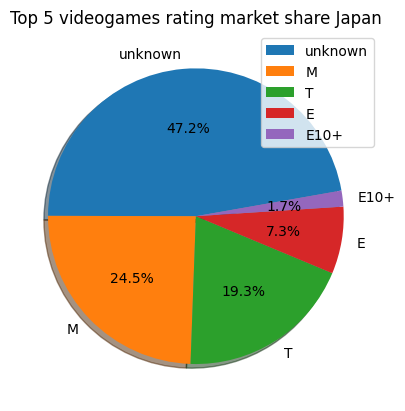

In [80]:
plt.pie(jp_rating_sales.jp_sales, labels = jp_rating_sales['rating'], autopct='%1.1f%%', shadow=True, startangle=10)
plt.title("Top 5 videogames rating market share Japan")
plt.legend()
plt.show() 

#### 4.3.4 Conclusion JP market <a id='jp_conclusion'></a>

So for the Japanese market the highest sales are best linked to PS3 console, Action and unknown rating videogames 

### 4.4 Markets comparison <a id='markets'></a>

Now we see how the markets evolved globally since 2012

In [81]:
global_sales = df_2012.groupby(['year_of_release'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales',]].agg('sum')
global_sales

,na_sales,eu_sales,jp_sales,other_sales
year_of_release,,,,
2012,123.39,94.06,27.24,30.32
2013,113.95,92.58,16.72,31.09
2014,76.49,86.75,9.54,26.99
2015,57.51,67.49,10.10,22.36
2016,24.27,37.39,7.04,11.10


These are the absolute values, but let's see how they relate between each other in percentage: 

In [82]:
global_sales.iloc[:,:] = global_sales.iloc[:,:].apply(lambda x: x/sum(x), axis=1)
global_sales

,na_sales,eu_sales,jp_sales,other_sales
year_of_release,,,,
2012,0.448675,0.342024,0.099051,0.110251
2013,0.448022,0.364001,0.065739,0.122238
2014,0.382890,0.434249,0.047755,0.135105
2015,0.365236,0.428617,0.064143,0.142004
2016,0.304135,0.468546,0.088221,0.139098


So, North American market is gradually losing the market share while European is gradually gaining. This could be interesting for our prediction

## Stage 5. Hypotesis testing<a id='hypotesis_testing'></a>

Hypothesis are claims, and we can use statistics to prove or disprove them. So we can check whether or not the claims are valid. To test our hypothesis we will follow these points:
- state the null hypothesis (H0)
- state the alternative hypothesis (Ha)
- determine a significance level
- calculate the p-value
- draw conclusion

### 5.1 Test: equality of the averages user_score for Xbox One and PC <a id='first_test'></a>

The first claim is: The average user_score for Xbox One and PC platforms are the same.

Lets set the Null Hypothesis (H0) and the Alternative Hypothesis (Ha):
- H0: no difference exist between the average user_score for Xbox One and PC
- Ha: a difference does exist between the average user_score for Xbox One and PC

We can assume a 95% of confidence level (meaning a 5% of significance level, α=5%) and so the question is: at α=5%, is there enough evidence to support the idea that the average user_score for Xbox One is the same of PC ?

In [83]:
# getting the two samples to compare
user_score_xone = df.loc[df['platform'] == 'XOne', ['user_score']].values.tolist()
user_score_pc = df.loc[df['platform'] == 'PC', ['user_score']].values.tolist()

alpha = 0.05  # the level of critical statistical significance

results = st.ttest_ind(user_score_xone, user_score_pc, nan_policy='omit')

print('p-value: ', results.pvalue)


if results.pvalue < alpha:  # if the p-value is less than alpha, we reject the hypothesis
    print("We reject the null hypothesis")
else:
    print("We do not reject the null hypothesis")

p-value:  [1.14880028e-05]
We reject the null hypothesis


Rejecting the null hypotesis in this case means that, with a significance level of 5%, the statement "no difference exist between the average user_score for Xbox One and PC" is false.  This does not necessarily mean that the alternative hypothesis is true.

Let's trace an histogram that resume the user_score of both consoles.

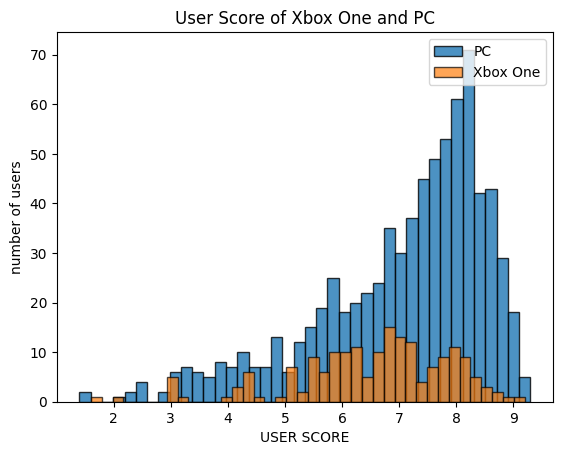

In [84]:
plt.hist(df.loc[df['platform'] == 'PC', ['user_score']], edgecolor = 'black', bins=40, alpha = 0.8, label= 'PC')
plt.hist(df.loc[df['platform'] == 'XOne', ['user_score']], edgecolor = 'black', bins=40, alpha = 0.7, label= 'Xbox One')
plt.title('User Score of Xbox One and PC')
plt.legend(loc='upper right')
plt.xlabel('USER SCORE')
plt.ylabel('number of users')
plt.show()

Let's plot now a probability density function for the user_score of both consoles.

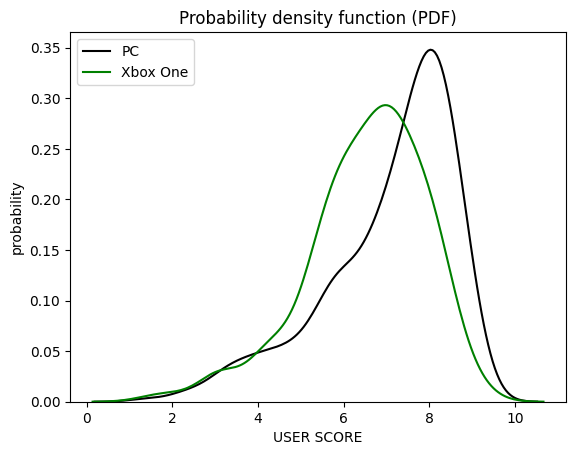

In [185]:
sns.kdeplot(data = df.loc[df['platform'] == 'PC', ['user_score']], x='user_score', color='black', label='PC')
sns.kdeplot(data = df.loc[df['platform'] == 'XOne', ['user_score']], x='user_score', color='green', label='Xbox One')
plt.legend()
plt.title('Probability density function (PDF)')
plt.xlabel('USER SCORE')
plt.ylabel('probability')
plt.show()

### 5.2 Test: inequality of the averages user_score for the Action and Sport games <a id='second_test'></a>

The second claim is: The average user_score for the Action and Sports genres are different.

Lets set the Null Hypothesis (H0) and the Alternative Hypothesis (Ha):
- H0: no difference exists between the average user_score of the Action and Sports games
- Ha: difference does exist between the average user_score of the Action and Sports games

We can assume a 95% of confidence level (meaning a 5% of significance level, α=5%) and so the question is: at α=5%, is there enough evidence to support the idea that the average user_score for Action games differs from that of Sport games ?

In [85]:
# getting the two samples to compare
user_score_action = df.loc[df['genre'] == 'Action', ['user_score']].values.tolist()
user_score_sport = df.loc[df['genre'] == 'Sports', ['user_score']].values.tolist()

alpha = 0.05  # the level of critical statistical significance

results_2 = st.ttest_ind(user_score_action, user_score_sport, nan_policy='omit')

print('p-value: ', results_2.pvalue)


if results_2.pvalue < alpha:  # if the p-value is less than alpha, we reject the hypothesis
    print("We reject the null hypothesis")
else:
    print("We do not reject the null hypothesis")

p-value:  [0.08026183]
We do not reject the null hypothesis


Not rejecting the null hypotesis in this case means that, with a significance level of 5%, the statement "no difference exists between the average user_score of the Action and Sports games" is true.  In other words, there is a 8% probability that the average user_score for Action and Sports games are the same

Let's trace an histogram that resume the user_score of both genres.

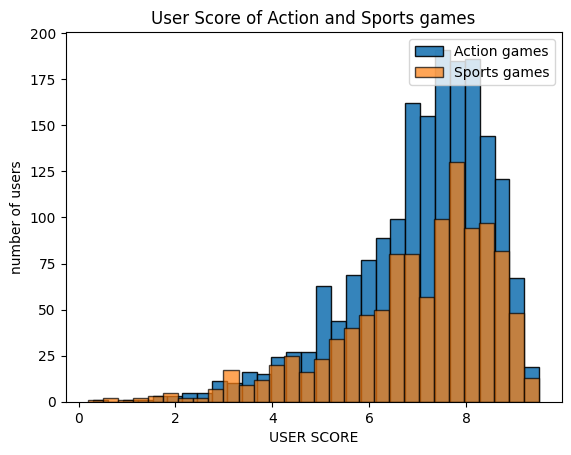

In [86]:
plt.hist(df.loc[df['genre'] == 'Action', ['user_score']], edgecolor = 'black', bins=30, alpha = 0.9, label= 'Action games')
plt.hist(df.loc[df['genre'] == 'Sports', ['user_score']], edgecolor = 'black', bins=30, alpha = 0.7, label= 'Sports games')
plt.title('User Score of Action and Sports games')
plt.legend(loc='upper right')
plt.xlabel('USER SCORE')
plt.ylabel('number of users')
plt.show()

Let's plot now a probability density function for the user_score of genres.

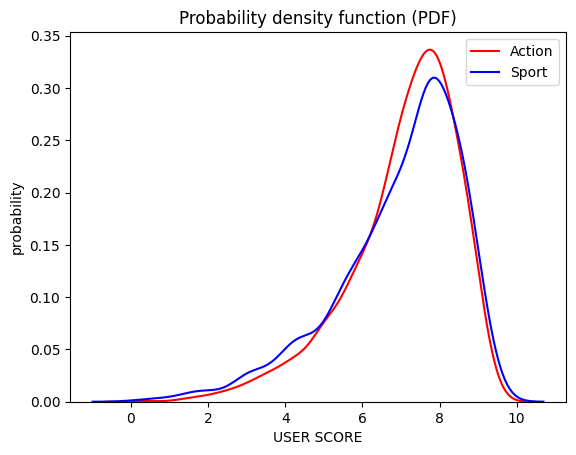

In [191]:
sns.kdeplot(data = df.loc[df['genre'] == 'Action', ['user_score']], x='user_score', color='red', label='Action')
sns.kdeplot(data = df.loc[df['genre'] == 'Sports', ['user_score']], x='user_score', color='Blue', label='Sport')
plt.legend()
plt.title('Probability density function (PDF)')
plt.xlabel('USER SCORE')
plt.ylabel('probability')
plt.show()

## General conclusion <a id='conclusion'></a>

We started our project with the aim of identifying the elements that determine if a game will be successful or not.

From an open source we got a 16713x11 dataframe reporting for each videogame the correspondent genre, platform, year of release, critic and user review, rating, sales by region etc.

This dataframe has been treated to fulfill where possible the absent values. In column 'year_of_release', we replaced the absent values with the mean value of the corresponding videogame but for 'user_score', 'critic_score' and 'rating', having only the +/- 50% of data available in each column we could not do that. So we left 'user_score', 'critic_score' with their nan and replaced null values in rating with 'unknown'

We then continued with the data analysis, answering the questions one by one and realizing that:
- videogames were booming from 1994 to 2008, after they declined
- Best selling consoles for period 1980-2016 are: PS2, Xbox 360, PS3
- Best selling period for consoles was between 2006 and 2010, but for our analysis, since most of the consoles were discontinued in 2017(year to predict) we studied more recent data starting from 2012
- For the last years the best selling platform is PS4
- The user reviews and professional reviews are correlated with sales
- Except for few videogames, PS4 and X360 are the most consistent consoles
- The best selling genre is 'Action'

After that we analyzed region-by-region the users preferences about platform, genre and rating. We found out that:
- American users prefer X360 and PS4, Action and M-rated videogames.
- European prefer PS4, Action and M-rated videogames. 
- Japanese prefer PS3, Action and unknown genre videogames.

So, Action videogames are largely preferred by all markets while PS4 seems the most used console. M-rated videogames are dominant in NA and EU, the top two markets.

Other important aspect is that Euro market is gaining control, so its characteristics should play a bigger role when choosing a strategy on which game will be sold the most.

Finally, we perform the hypothesis test. These tests aimed to verify if two statistical population's averages were different. Populations in our case were:
- 'user_score' for Xbox One and 'user_score' for PC
- 'user_score' for Action games and 'user_score' for Sports games

For the first case, we rejected the null hypothesis and so we confirm that the probability that average user_score for Xbox and PC are the same is less than the significance level (5%)

For the second case, we did not reject the null hypothesis and so we confirm that the probability that the average user_score for Action and Sport games are the same is bigger than the significance level (5%)